# Exploration du dataset

In [29]:
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,5)

sns.set_style("white")

#dataset path
path = "dataset"

In [3]:
import codecs

nbLignes = []
for serie in os.listdir(path):
    for season in os.listdir(os.path.join(path,serie)):
        if os.path.isdir(os.path.join(path,serie+os.sep+season)):
            episodes = glob.glob(os.path.join(path,serie+os.sep+season+os.sep+"*.lines"))
            for episode in episodes:
                with codecs.open(episode, "r", "utf-8") as file:
                    nbLignes.append(len(file.readlines()))


In [49]:
nbSaisons = 0
nbEpisodes = 0
nbSeasonsParSerie = []
nbEpisodesParSaison = []
nbEpisodesParSerie = []

listrep = os.listdir(path)
for serie in listrep:
    seasons = [season for season in os.listdir(os.path.join(path,serie)) if os.path.isdir(os.path.join(path,serie+os.sep+season))]
    nbSeasonsParSerie.append(len(seasons))
    nbSaisons += len(seasons)
    nbEp = 0
    for season in seasons:
        episodes = glob.glob(os.path.join(path,serie+os.sep+season+os.sep+"*.lines"))
        nbEpisodesParSaison.append(len(episodes))
        nbEp += len(episodes)
        nbEpisodes += len(episodes)
    nbEpisodesParSerie.append(nbEp)
    
print("nombre total de séries: " + str(len(listrep)))
print("nombre total de saisons: " + str(nbSaisons))
print("nombre total d'épisodes: " + str(nbEpisodes))

nombre total de séries: 3369
nombre total de saisons: 6850
nombre total d'épisodes: 78353


Regardons le nombre moyen de lignes par épisode:

In [51]:
nbLignes = np.array(nbLignes)
print("Nombre de moyen de lignes par épisode: {}".format(int(nbLignes.mean())))

Nombre de moyen de lignes par épisode: 634


### Regardons maintenant la répartition du nombre de lignes par épisode:

Nombre de lignes moyen: 634
Ecart-type: 295.2198833


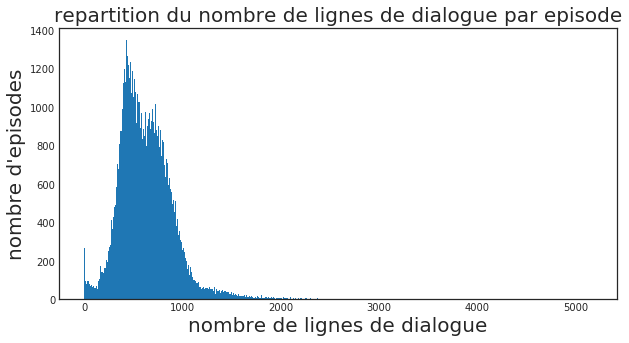

In [52]:
print("Nombre de lignes moyen: {}".format(int(nbLignes.mean())))
print("Ecart-type: {}".format(nbLignes.std()))

plt.xlabel('nombre de lignes de dialogue', fontsize=20)
plt.ylabel("nombre d'episodes", fontsize=20)
plt.title("repartition du nombre de lignes de dialogue par episode", fontsize=20)
plt.hist(nbLignes, 600)
plt.show()

### Affichons maintenant différentes statistiques descriptives, comme la répartition du nombre de saisons ou d'épisodes

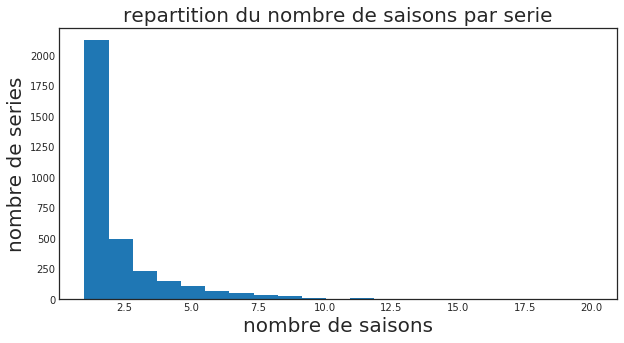

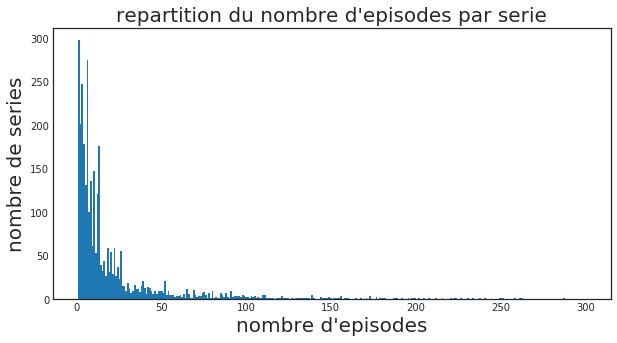

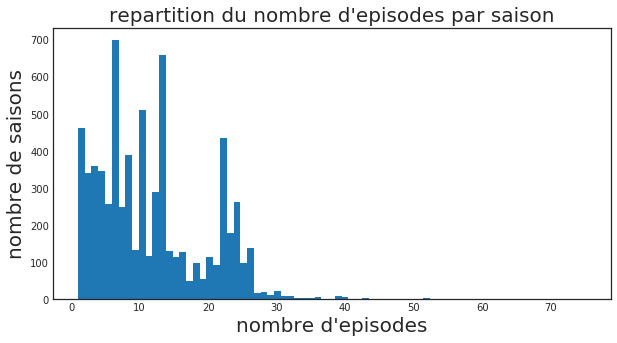

In [56]:
plt.xlabel('nombre de saisons', fontsize=20)
plt.ylabel("nombre de series", fontsize=20)
plt.title("repartition du nombre de saisons par serie", fontsize=20)
plt.hist(nbSeasonsParSerie, 21, range=(1, 20))
plt.show()

plt.xlabel("nombre d'episodes", fontsize=20)
plt.ylabel('nombre de series', fontsize=20)
plt.title("repartition du nombre d'episodes par serie", fontsize=20)
plt.hist(nbEpisodesParSerie, 300, range=(1, 300))
plt.show()

plt.xlabel("nombre d'episodes", fontsize=20)
plt.ylabel('nombre de saisons', fontsize=20)
plt.title("repartition du nombre d'episodes par saison", fontsize=20)
plt.hist(nbEpisodesParSaison, 75, range=(1, 75))
plt.show()

In [54]:
nbSeasonsParSerie = np.array(nbSeasonsParSerie)
nbEpisodesParSaison = np.array(nbEpisodesParSaison)
nbEpisodesParSerie = np.array(nbEpisodesParSerie)

print("Nombre moyen d'épisodes par série: {}".format(int(nbEpisodesParSerie.mean())))
print("Ecart-type: {}".format(nbEpisodesParSerie.std()))

print("Nombre moyen d'épisode par saison: {}".format(int(nbEpisodesParSaison.mean())))
print("Ecart-type: {}".format(nbEpisodesParSaison.std()))

print("Nombre moyen de saisons par série: {}".format(int(nbSeasonsParSerie.mean())))
print("Ecart-type: {}".format(nbSeasonsParSerie.std()))

Nombre moyen d'épisodes par série: 23
Ecart-type: 41.0285011055
Nombre moyen d'épisode par saison: 11
Ecart-type: 8.54556274781
Nombre moyen de saisons par série: 2
Ecart-type: 2.21601852302




On peut donc difficilement penser à un classifieur de saison, quand on sait que pour la plupart des séries, il n'y a qu'une seule saison... on peut en revanche envisager de construire des classifieurs de série pour un épisode donné.